# ----------------SENTIMENT ANALYSIS---------------

### ---------------------------------USING NLTK VADER-------------------------------

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def process_the_script(important_chars,txt_path):
    df = pd.read_csv(txt_path)
    char_Wise_Dialogue = {}
    for char in important_chars:
        char_Wise_Dialogue[char] = []
    for i in range(len(df)):
        for char in important_chars:
            if char in df['character'][i]:
                char_Wise_Dialogue[char].append(df['line'][i])
    return char_Wise_Dialogue


NLTK Vader Sentiment Analysis


In [32]:
import nltk
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')# Compute sentiment labels

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vartika\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
char_movie_wise_dialogues = {}

In [34]:
def compute_sentiment_labels(dialogues):
    sid = SentimentIntensityAnalyzer()
    sentiment_labels = []
    for dialogue in dialogues:
        sentiment_labels.append(sid.polarity_scores(dialogue)['compound'])
    return sentiment_labels

def plot_sentiment_distribution(sent_dicts):
    pos_counts = {}
    neg_counts = {}
    neu_counts = {}

    for char in sent_dicts:
        pos_counts[char] = 0
        neg_counts[char] = 0
        neu_counts[char] = 0
        for sent in sent_dicts[char]:
            if sent >= 0.05:
                pos_counts[char] += 1
            elif sent <= -0.05:
                neg_counts[char] += 1
            else:
                neu_counts[char] += 1
    # plot graph for sentiment analysis
    import matplotlib.pyplot as plt
    import numpy as np

    chars = list(pos_counts.keys())
    pos = list(pos_counts.values())
    neg = list(neg_counts.values())
    neu = list(neu_counts.values())

    x = np.arange(len(chars))
    fig, ax = plt.subplots()
    bar_width = 0.2
    b1 = ax.bar(x, pos, width=bar_width, label='Number of Positive Dialogues')
    b2 = ax.bar(x + bar_width, neg, width=bar_width, label='Number of Negative Dialogues')
    b3 = ax.bar(x + 2*bar_width, neu, width=bar_width, label='Number of Neutral Dialogues')

    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(chars, rotation=90)
    ax.legend()
    plt.show()
    total = {}
    for char in sent_dicts:
        total[char] = pos_counts[char] + neg_counts[char] + neu_counts[char]
    pos_perc = {}
    neg_perc = {}
    neu_perc = {}
    for char in sent_dicts:
        pos_perc[char] = pos_counts[char] / total[char]
        neg_perc[char] = neg_counts[char] / total[char]
        neu_perc[char] = neu_counts[char] / total[char]

    # plot graph for sentiment analysis
    import matplotlib.pyplot as plt
    import numpy as np

    chars = list(pos_perc.keys())
    pos = list(pos_perc.values())
    neg = list(neg_perc.values())
    neu = list(neu_perc.values())

    x = np.arange(len(chars))
    fig, ax = plt.subplots()
    bar_width = 0.2
    b1 = ax.bar(x, pos, width=bar_width, label='Percent of Positive Dialogues')
    b2 = ax.bar(x + bar_width, neg, width=bar_width, label='Percent of Negative Dialogues')
    b3 = ax.bar(x + 2*bar_width, neu, width=bar_width, label='Percent of Neutral Dialogues')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(chars, rotation=90)
    ax.legend()
    plt.show()
    del sent_dicts

def plot_movie_sentiments(movie_path,important_chars):
    dialogues = process_the_script(important_chars,movie_path)
    sent_dicts = {}
    for char in dialogues:
        sent_dicts[char] = compute_sentiment_labels(dialogues[char])

    char_movie_wise_dialogues[movie_path.split("/")[1]] = sent_dicts
    plot_sentiment_distribution(sent_dicts)
    del important_chars,sent_dicts,dialogues



### Iron man 1 (2008)

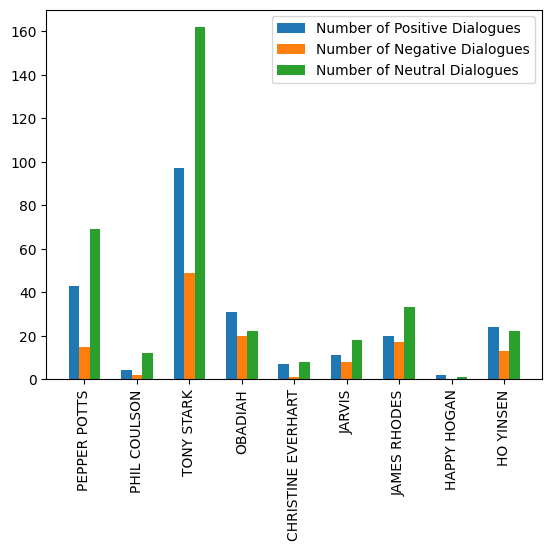

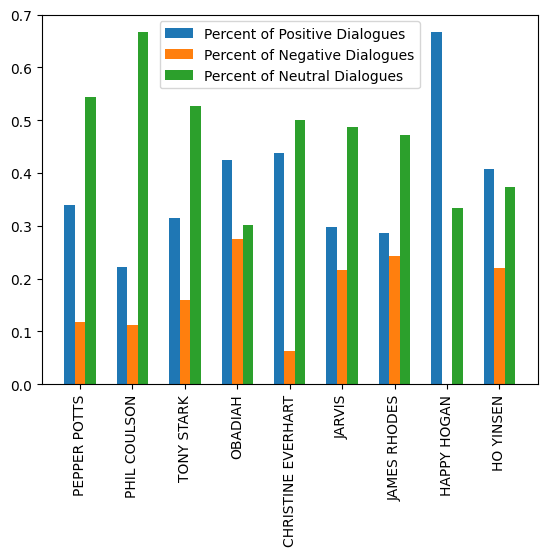

In [35]:
read_data = 'script_csv/iron_man.csv'
important_chars = ['PEPPER POTTS','PHIL COULSON','TONY STARK','OBADIAH','CHRISTINE EVERHART','JARVIS','JAMES RHODES','HAPPY HOGAN','HO YINSEN']
plot_movie_sentiments(read_data,important_chars)

IRON MAN 2 (2010)

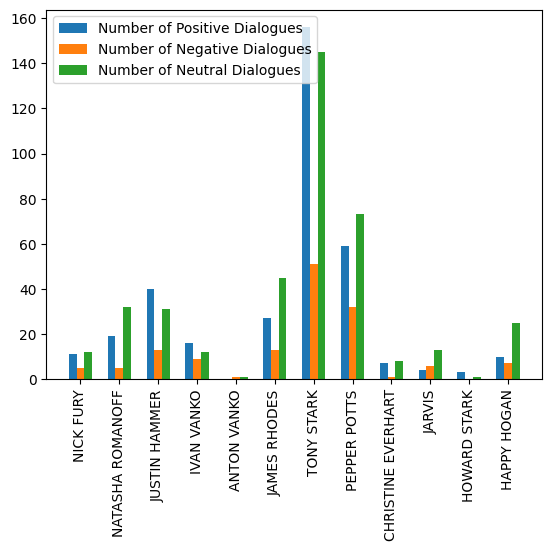

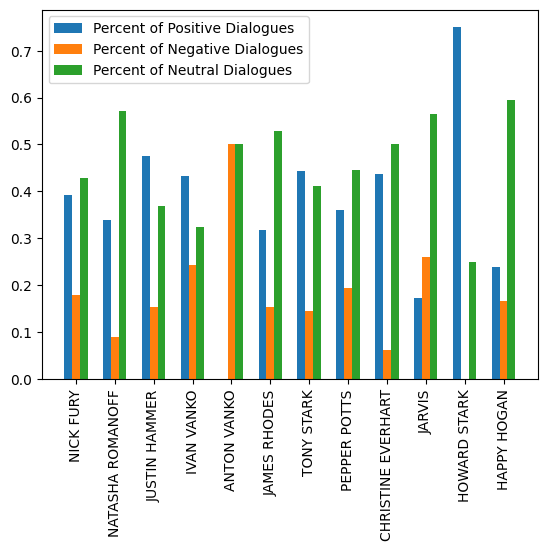

In [36]:
important_chars = ['NICK FURY','NATASHA ROMANOFF','JUSTIN HAMMER','IVAN VANKO','ANTON VANKO','JAMES RHODES','TONY STARK','PEPPER POTTS','CHRISTINE EVERHART','JARVIS','HOWARD STARK','HAPPY HOGAN']
read_data = 'script_csv/iron_man_2.csv'
plot_movie_sentiments(read_data,important_chars)





THOR (2011)

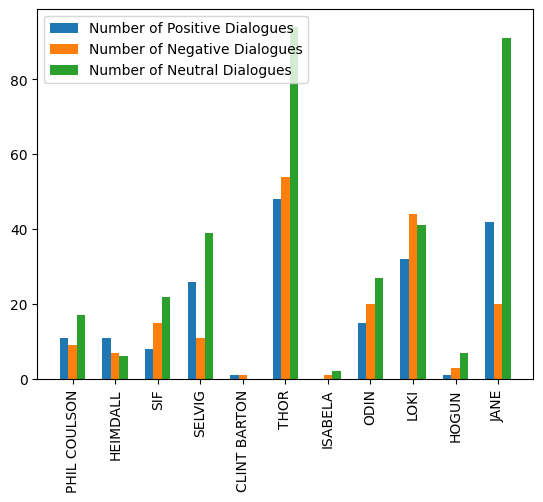

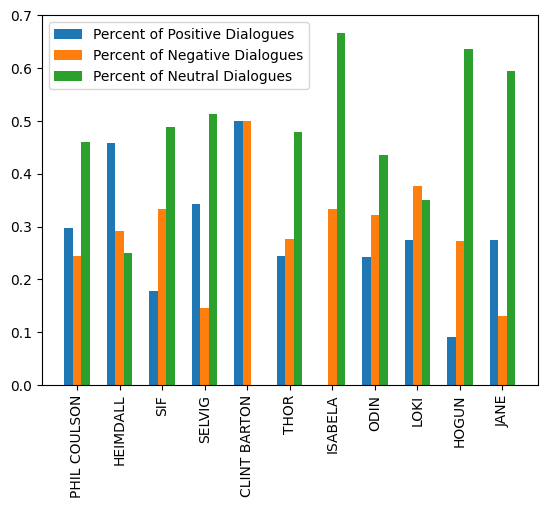

In [54]:
important_chars = ['PHIL COULSON','HEIMDALL','SIF','SELVIG','CLINT BARTON','THOR','ISABELA','ODIN','LOKI','HOGUN','JANE']
read_data = 'script_csv/thor.csv'
plot_movie_sentiments(read_data,important_chars)

CAPTAIN AMERICA: THE FIRST AVENGER (2011)

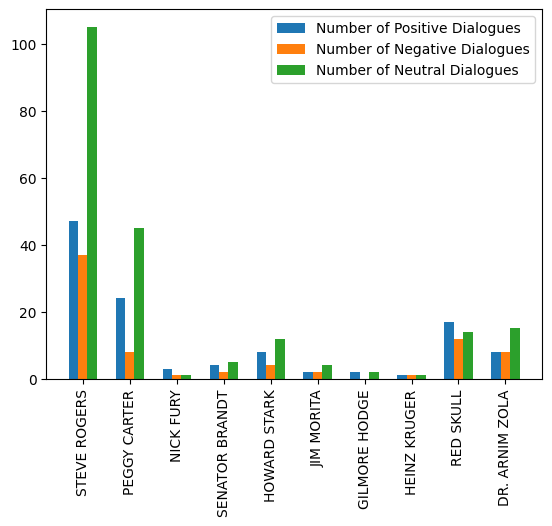

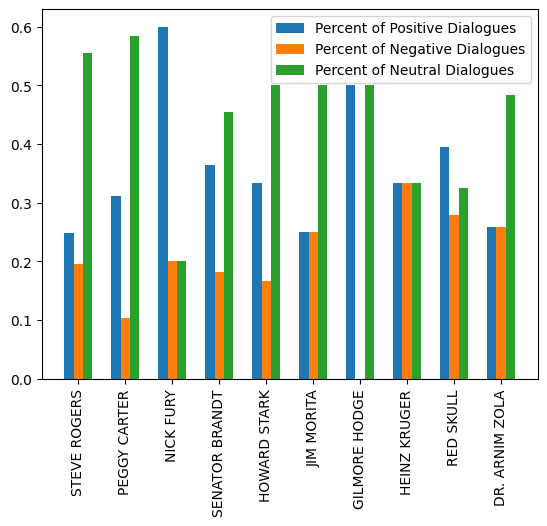

In [58]:
important_chars = ['STEVE ROGERS','PEGGY CARTER','NICK FURY','SENATOR BRANDT','HOWARD STARK','JIM MORITA','GILMORE HODGE','HEINZ KRUGER','RED SKULL','DR. ARNIM ZOLA']
read_data = 'script_csv/captain_america.csv'
plot_movie_sentiments(read_data,important_chars)


#

THE AVENGERS (2012)


17


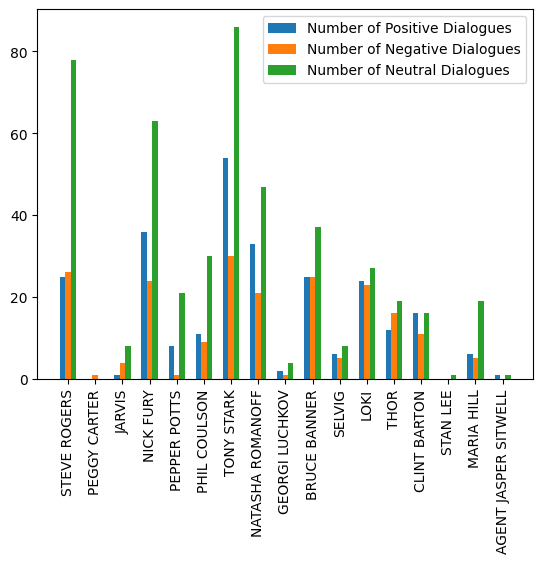

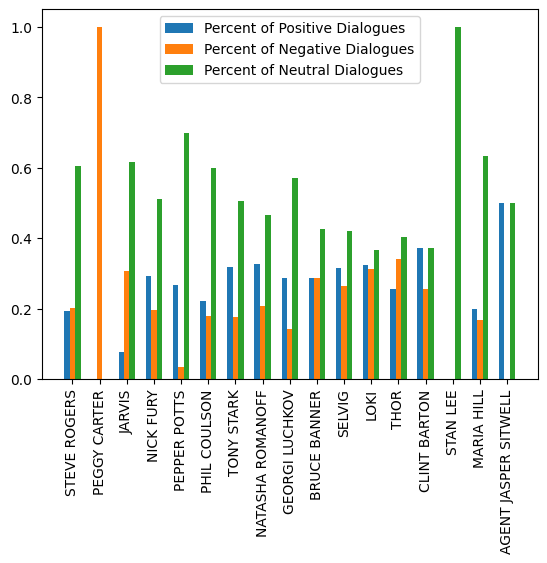

In [66]:

important_chars = ['STEVE ROGERS','PEGGY CARTER','JARVIS','NICK FURY','PEPPER POTTS','PHIL COULSON','TONY STARK','NATASHA ROMANOFF','GEORGI LUCHKOV','BRUCE BANNER','SELVIG','LOKI','THOR','CLINT BARTON','STAN LEE','MARIA HILL','AGENT JASPER SITWELL']
print(len(important_chars))
read_data = 'script_csv/avengers.csv'
plot_movie_sentiments(read_data,important_chars)

IRON MAN 3 (2013)

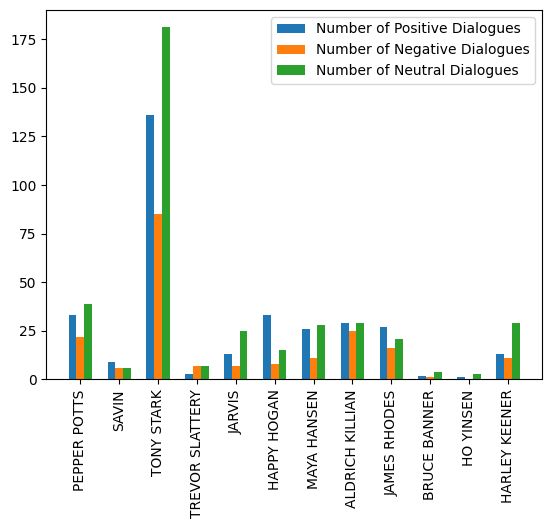

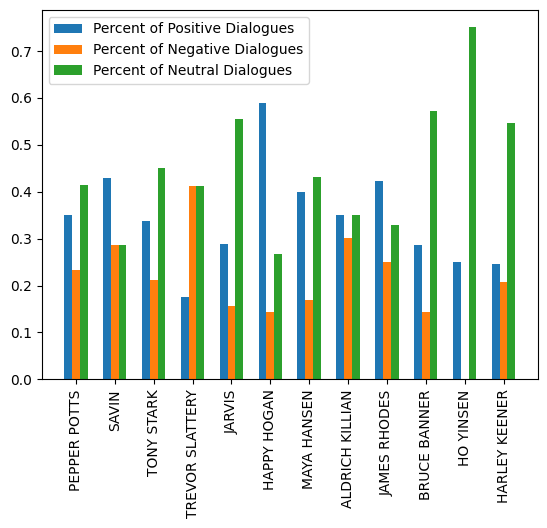

In [70]:
important_chars = ['PEPPER POTTS','SAVIN','TONY STARK','TREVOR SLATTERY','JARVIS','HAPPY HOGAN','MAYA HANSEN','ALDRICH KILLIAN','JAMES RHODES','BRUCE BANNER','HO YINSEN','HARLEY KEENER']
read_data = 'script_csv/iron_man_3.csv'
plot_movie_sentiments(read_data,important_chars)

THOR 2: THE DARK WORLD (2013)

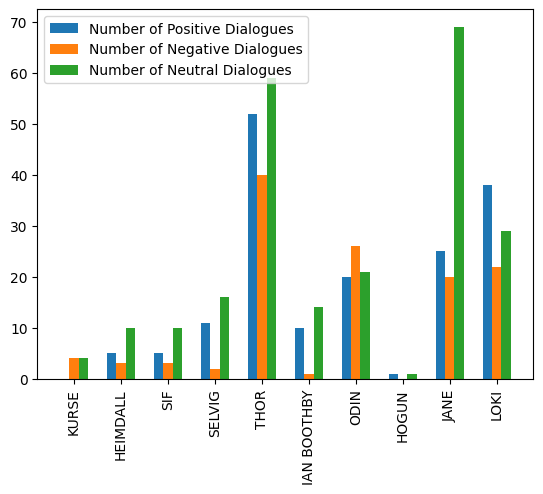

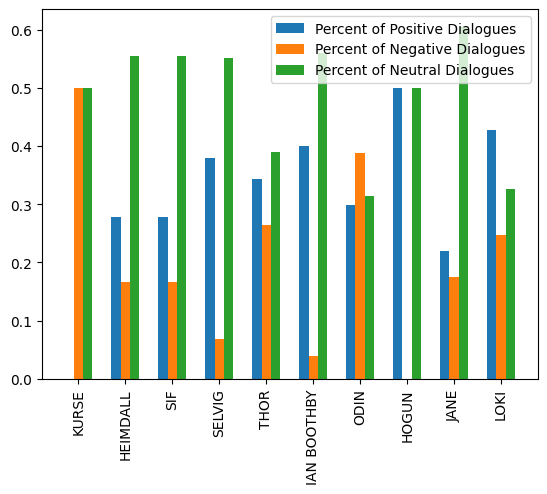

In [72]:
important_chars = ['KURSE','HEIMDALL','SIF','SELVIG','THOR','IAN BOOTHBY','ODIN','HOGUN','JANE','LOKI']
read_data = 'script_csv/thor_dark_world.csv'
plot_movie_sentiments(read_data,important_chars)

CAPTAIN AMERICA: THE WINTER SOLDIER (2014)

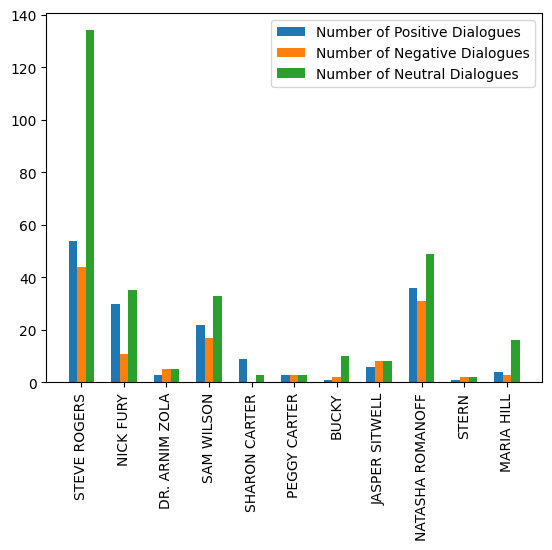

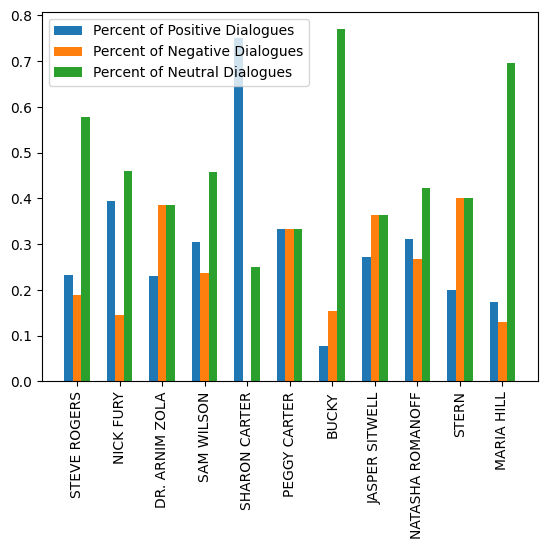

In [74]:
important_chars = ['STEVE ROGERS','NICK FURY','DR. ARNIM ZOLA','SAM WILSON','SHARON CARTER','PEGGY CARTER','BUCKY','JASPER SITWELL','NATASHA ROMANOFF','STERN','MARIA HILL']
read_data = 'script_csv/winter_soldier.csv'
plot_movie_sentiments(read_data,important_chars)

AVENGERS: AGE OF ULTRON (2015)

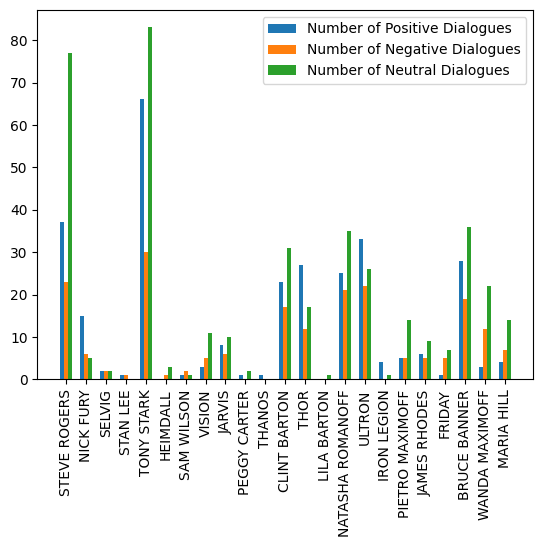

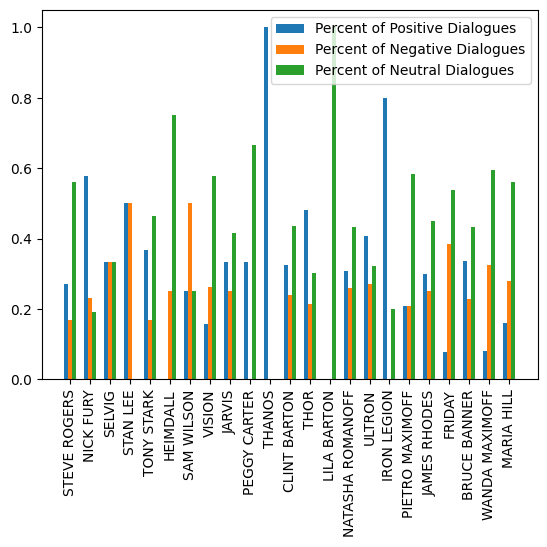

In [76]:
important_chars = ['STEVE ROGERS','NICK FURY','SELVIG','STAN LEE','TONY STARK','HEIMDALL','SAM WILSON','VISION','JARVIS','PEGGY CARTER','THANOS','CLINT BARTON','THOR','LILA BARTON','NATASHA ROMANOFF','ULTRON','IRON LEGION','PIETRO MAXIMOFF','JAMES RHODES','FRIDAY','BRUCE BANNER','WANDA MAXIMOFF','MARIA HILL']
read_data = 'script_csv/age_of_ultron.csv'
plot_movie_sentiments(read_data,important_chars)

ANT MAN (2015)

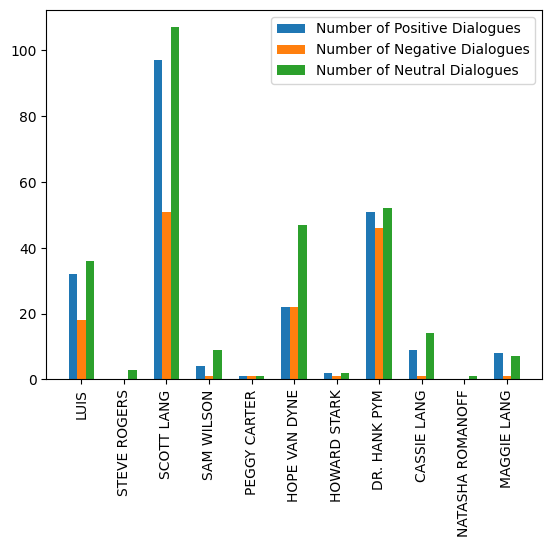

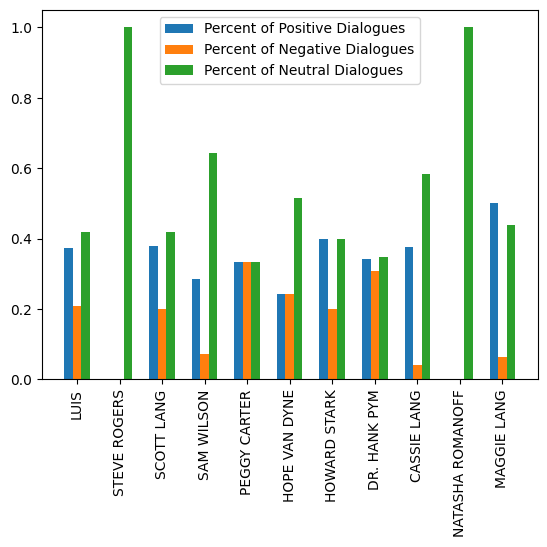

In [77]:
important_chars = ['LUIS', 'STEVE ROGERS','SCOTT LANG','SAM WILSON','PEGGY CARTER','HOPE VAN DYNE','HOWARD STARK','DR. HANK PYM','CASSIE LANG','NATASHA ROMANOFF','MAGGIE LANG']
read_data = 'script_csv/ant_man.csv'
plot_movie_sentiments(read_data,important_chars)


CAPTAIN AMERICA: CIVIL WAR (2016)

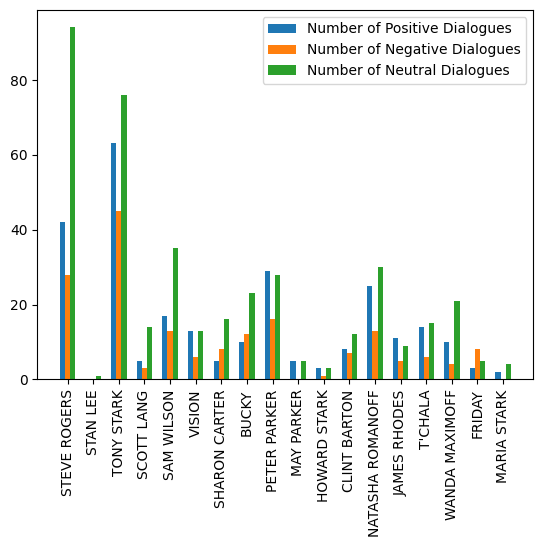

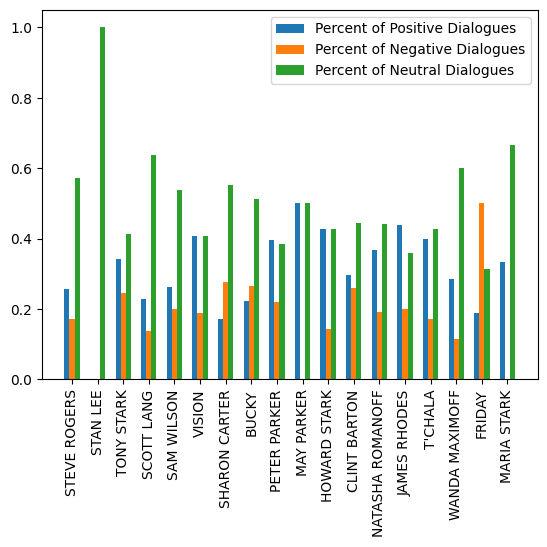

In [80]:
important_chars = ['STEVE ROGERS','STAN LEE','TONY STARK','SCOTT LANG','SAM WILSON','VISION','SHARON CARTER','BUCKY','PETER PARKER','MAY PARKER','HOWARD STARK','CLINT BARTON','NATASHA ROMANOFF','JAMES RHODES','T\'CHALA','WANDA MAXIMOFF','FRIDAY','MARIA STARK']
read_data = 'script_csv/civil_war.csv'
plot_movie_sentiments(read_data,important_chars)

THOR 3: RAGNAROK (2017)

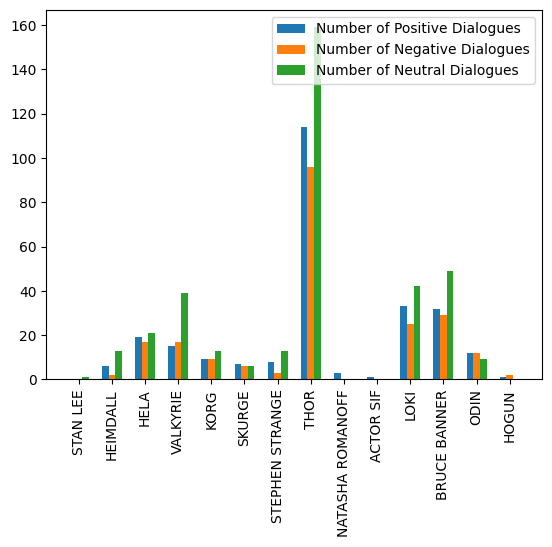

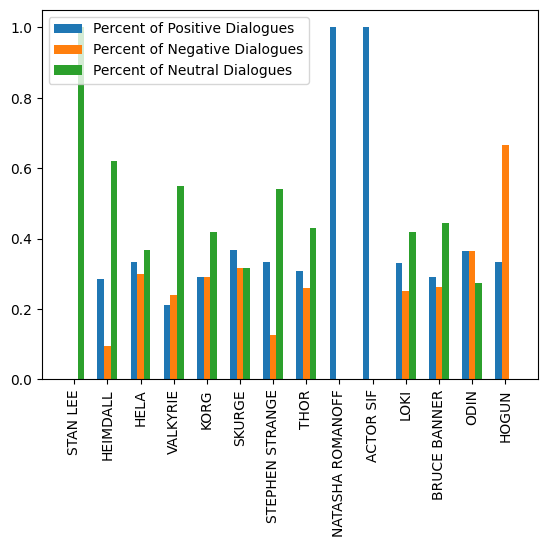

In [81]:
important_chars = ['STAN LEE','HEIMDALL','HELA','VALKYRIE','KORG','SKURGE','STEPHEN STRANGE','THOR','NATASHA ROMANOFF','ACTOR SIF','LOKI','BRUCE BANNER','ODIN','HOGUN']
read_data = 'script_csv/ragnarok.csv'
plot_movie_sentiments(read_data,important_chars)

BLACK PANTHER (2018)

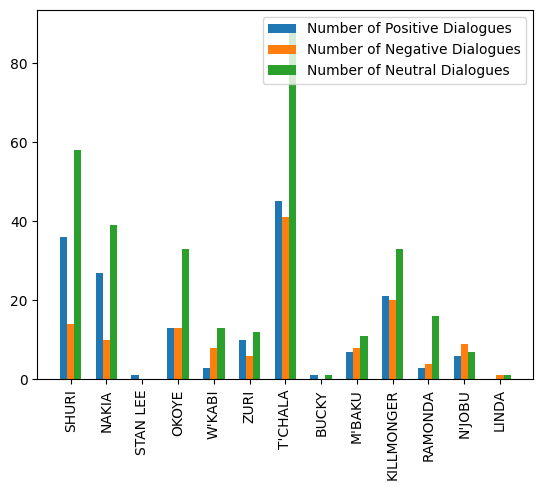

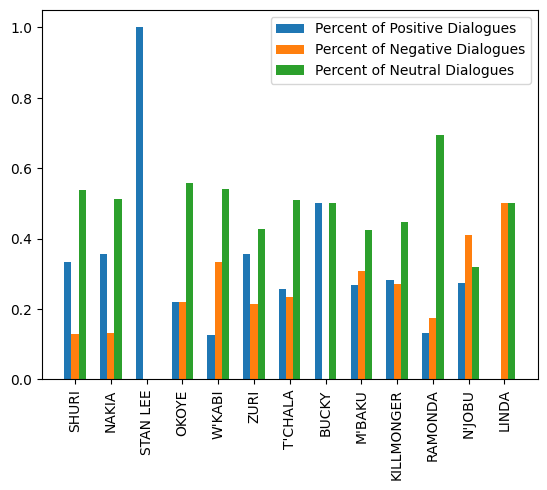

In [82]:
important_chars = ['SHURI','NAKIA','STAN LEE','OKOYE','W\'KABI','ZURI','T\'CHALA','BUCKY','M\'BAKU','KILLMONGER','RAMONDA','N\'JOBU','LINDA']
read_data = 'script_csv/black_panther.csv'
plot_movie_sentiments(read_data,important_chars)

AVENGERS: INFINITY WAR (2018)

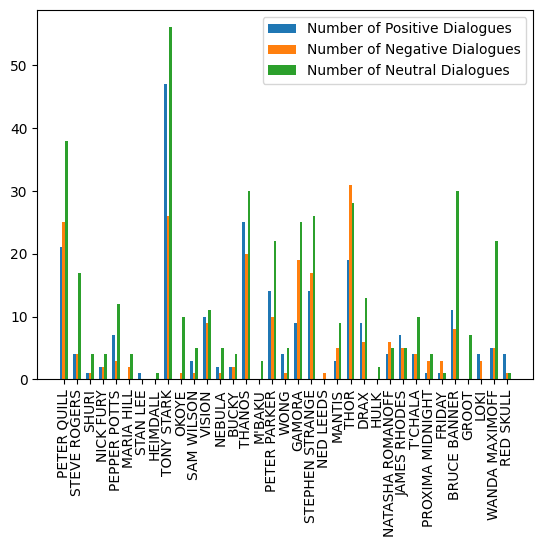

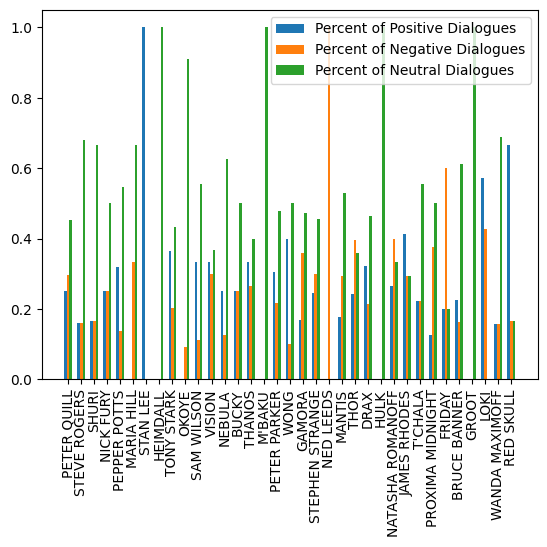

In [86]:
important_chars = ['PETER QUILL','STEVE ROGERS','SHURI','NICK FURY','PEPPER POTTS','MARIA HILL','STAN LEE','HEIMDALL','TONY STARK','OKOYE','SAM WILSON','VISION','NEBULA','BUCKY','THANOS','M\'BAKU','PETER PARKER','WONG','GAMORA','STEPHEN STRANGE','NED LEEDS','MANTIS','THOR','DRAX','HULK','NATASHA ROMANOFF','JAMES RHODES','T\'CHALA','PROXIMA MIDNIGHT','FRIDAY','BRUCE BANNER','GROOT','LOKI','WANDA MAXIMOFF','RED SKULL']
read_data = 'script_csv/infinity_war.csv'
plot_movie_sentiments(read_data,important_chars)

AVENGERS: ENDGAME (2019)

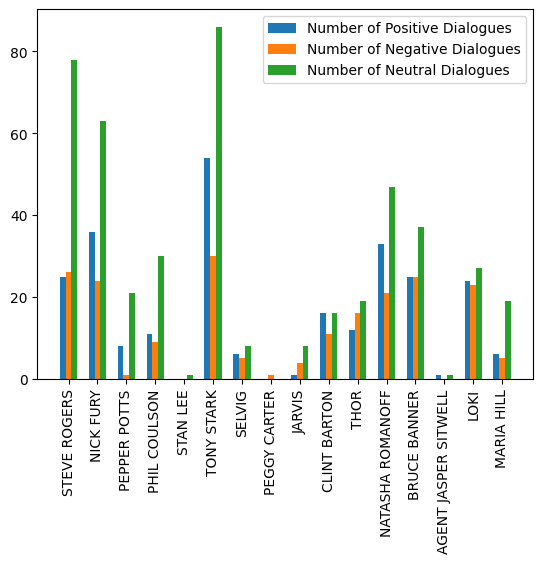

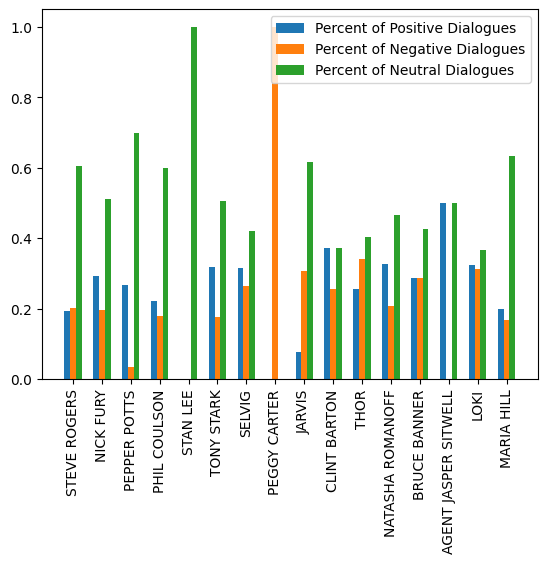

In [87]:

important_chars = ['STEVE ROGERS','NICK FURY','PEPPER POTTS','PHIL COULSON','STAN LEE','TONY STARK','SELVIG','PEGGY CARTER','JARVIS','CLINT BARTON','THOR','NATASHA ROMANOFF','BRUCE BANNER','AGENT JASPER SITWELL','LOKI','MARIA HILL']
read_data = 'script_csv/avengers_endgame.csv'
plot_movie_sentiments(read_data,important_chars)

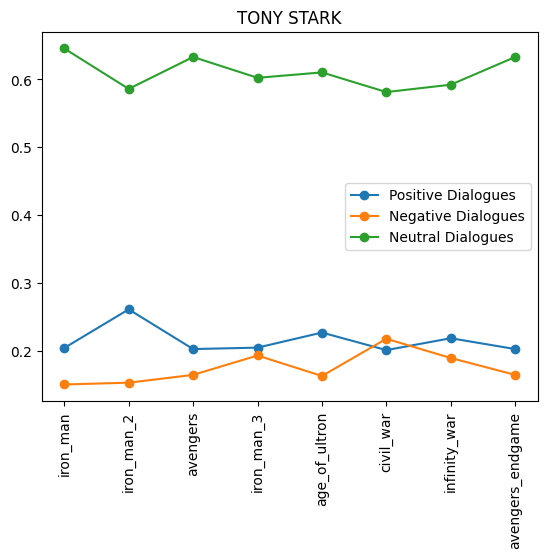

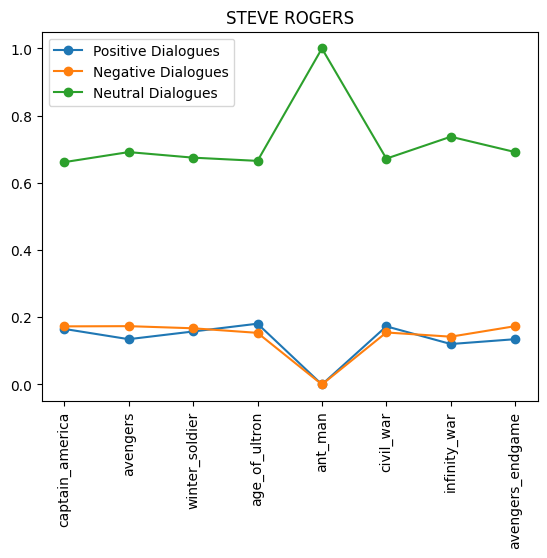

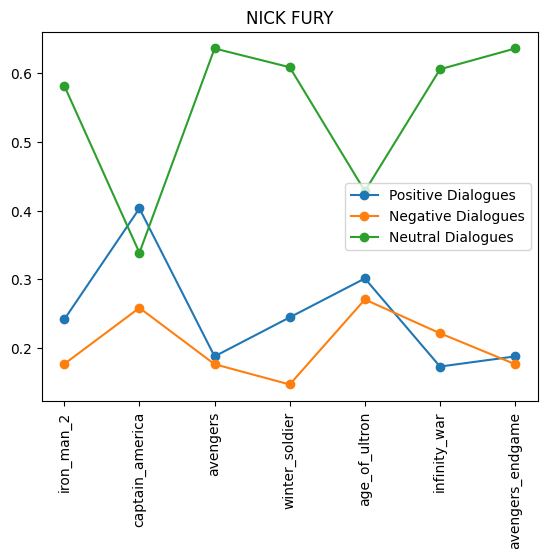

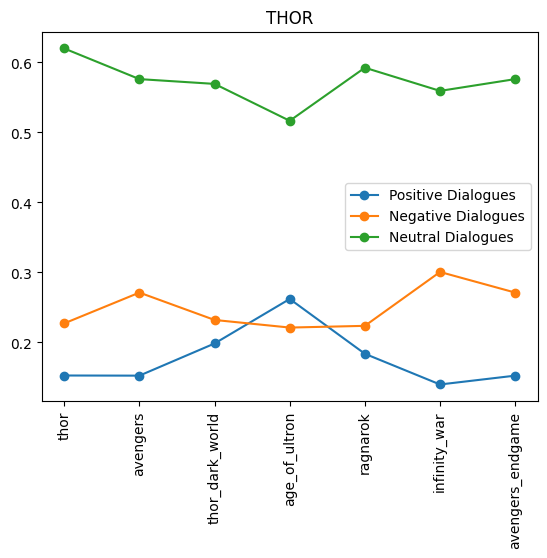

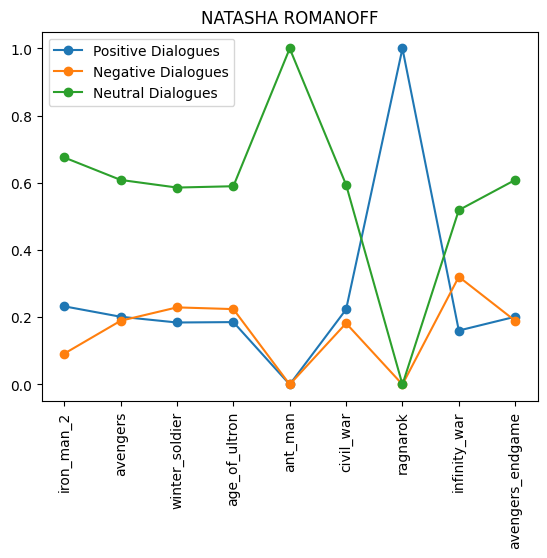

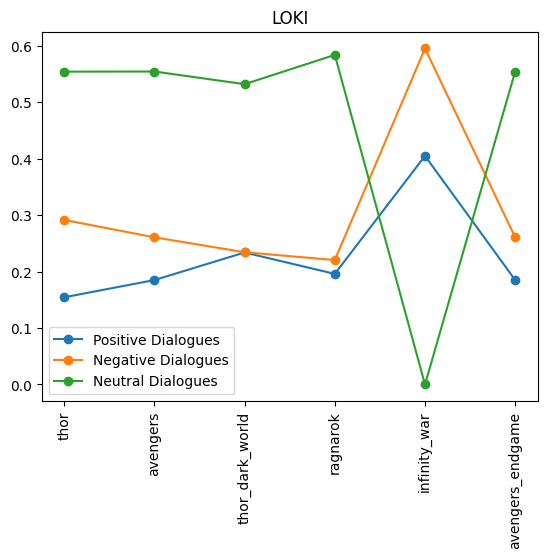

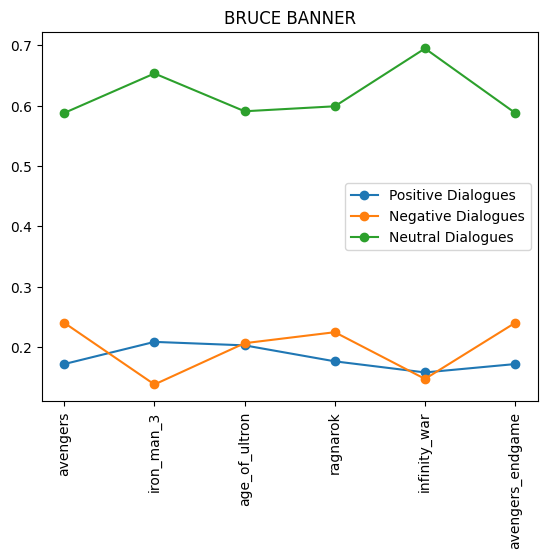

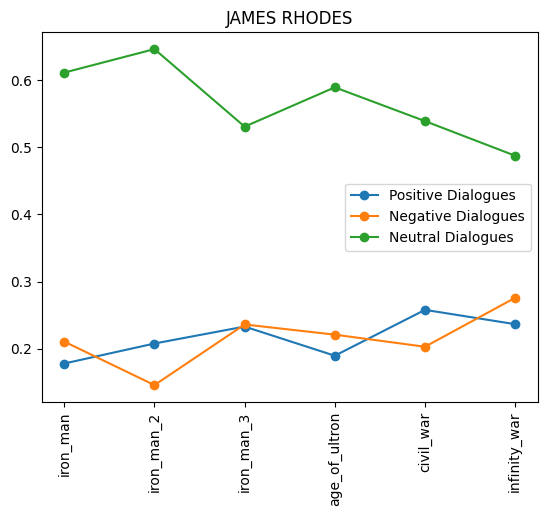

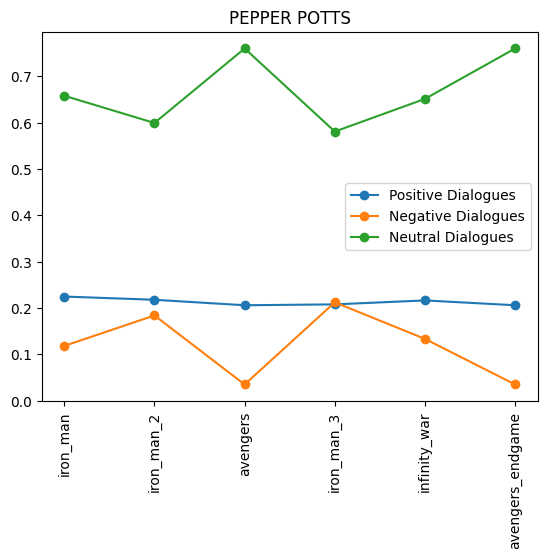

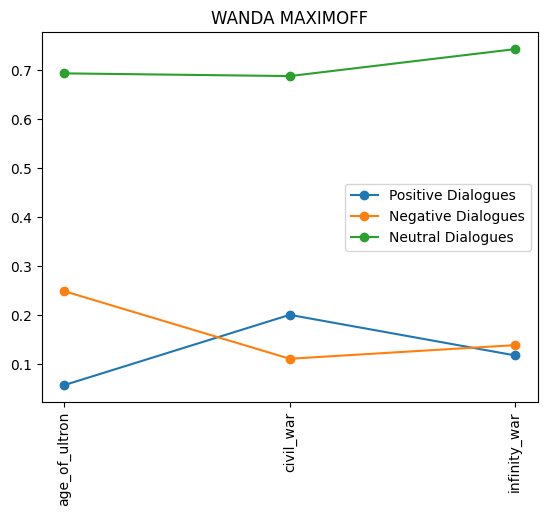

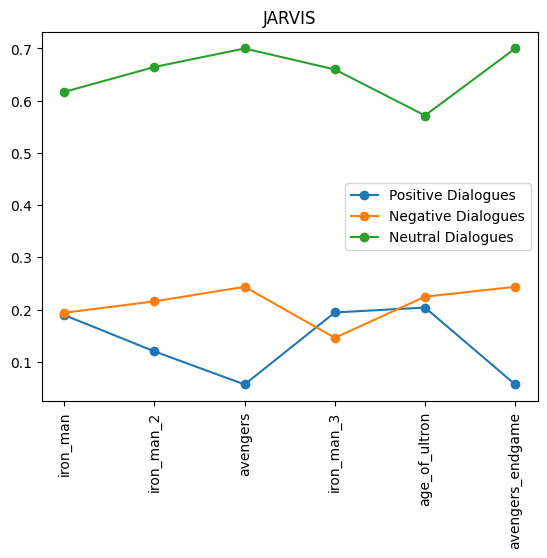

In [120]:
def get_accross_movie_trend(character):
    char = character
    trend_dict = {}
    for movie in char_movie_wise_dialogues:
        if char in char_movie_wise_dialogues[movie]:
            for c in char_movie_wise_dialogues[movie]:
                if c == char:
                    neutral = 0
                    positive = 0
                    negative = 0
                    for sent in char_movie_wise_dialogues[movie][c]:
                        if sent >= 0.05:
                            positive += 1
                        elif sent <= -0.05:
                            negative += 1
                        else:
                            neutral += 1
                    trend_dict[movie.split(".")[0]] = [positive,negative,neutral]
    return trend_dict

def plot_accross_movie_trend(character) :
    char = character
    trend_list = get_accross_movie_trend(char)
    movies = list(trend_list.keys())
    pos = [trend_list[movie][0] for movie in movies]
    neg = [trend_list[movie][1] for movie in movies]
    neu = [trend_list[movie][2] for movie in movies]
    # make them percentages
    pos = [pos[i]/(pos[i] + neg[i] + neu[i]) for i in range(len(pos))]
    neg = [neg[i]/(pos[i] + neg[i] + neu[i]) for i in range(len(neg))]
    neu = [neu[i]/(pos[i] + neg[i] + neu[i]) for i in range(len(neu))]
    pos_n = []
    neg_n = []
    neu_n = []
    for i in range(len(pos)):
        pos_n.append(pos[i] / (pos[i] + neg[i] + neu[i]))
        neg_n.append(neg[i] / (pos[i] + neg[i] + neu[i]))
        neu_n.append(neu[i] / (pos[i] + neg[i] + neu[i]))
    # plot them as dots and make a line
    # plt.figure(figsize=(5,1))
    plt.plot(movies, pos_n, marker='o', label='Positive Dialogues')
    plt.plot(movies, neg_n, marker='o', label='Negative Dialogues')
    plt.plot(movies, neu_n, marker='o', label='Neutral Dialogues')
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(char)
    plt.show()
    # name the plot as the character
    
    # plot a smooth line

plot_accross_movie_trend('TONY STARK')
plot_accross_movie_trend('STEVE ROGERS')
plot_accross_movie_trend('NICK FURY')
plot_accross_movie_trend('THOR')
plot_accross_movie_trend('NATASHA ROMANOFF')
plot_accross_movie_trend('LOKI')
plot_accross_movie_trend('BRUCE BANNER')
plot_accross_movie_trend('JAMES RHODES')
plot_accross_movie_trend('PEPPER POTTS')
plot_accross_movie_trend('WANDA MAXIMOFF')
plot_accross_movie_trend('JARVIS')



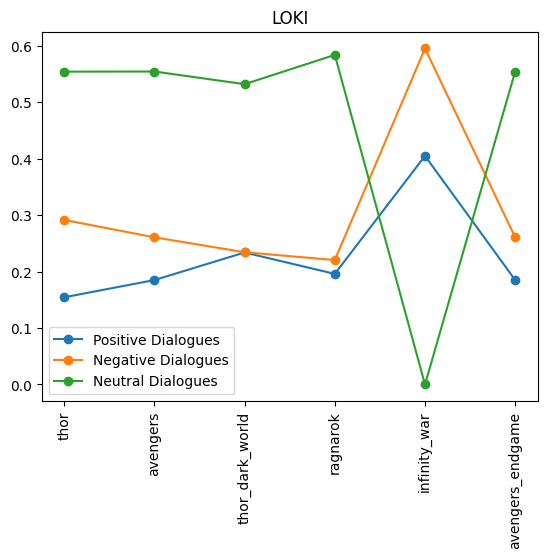

In [123]:
plot_accross_movie_trend('LOKI')
